In [450]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [451]:
filename = '/content/drive/MyDrive/bigdata_analysis_final_project - movie recommender system(영화 추천 시스템)/Data Preprocessing/rating_small_dataset.csv'
rating_df = pd.read_csv('/content/drive/MyDrive/bigdata_analysis_final_project - movie recommender system(영화 추천 시스템)/Data Preprocessing/rating_small_dataset.csv')
rating_df.rating = rating_df.rating / 2
rating_df.head()

,userId,movieId,naver_code,rating,timestamp
0,1,31,17504,2.5,1260759144
1,1,1061,17766,3.0,1260759182
2,1,1343,11082,2.0,1260759131
3,1,2193,10619,2.0,1260759198
4,1,2294,19477,2.0,1260759108


In [452]:
filename = '/content/drive/MyDrive/bigdata_analysis_final_project - movie recommender system(영화 추천 시스템)/Data Preprocessing/movie_dataset.csv'
movie_df = pd.read_csv('/content/drive/MyDrive/bigdata_analysis_final_project - movie recommender system(영화 추천 시스템)/Data Preprocessing/movie_dataset.csv')
movie_df.head(3)

,movieId,naver_code,title,title_kor,genres,keyword,director,cast,director_kor,cast_kor,...,naver_user_participate,naver_critics_rate,naver_critics_participate,nation,release_date,running_time,age,story,poster_url,url
0,1,17153,Toy Story,토이 스토리,Adventure Animation Children Comedy Fantasy,"jealousy,toy,boy,friendship,friends,rivalry,bo...",John Lasseter,"Tom Hanks,Tim Allen,Don Rickles",존 라세터,"톰 행크스, 팀 알렌",...,1393,0.0,0,미국,2010.05.05 1995.12.30,77분,"전체 관람가, G",우디(톰 행크스 목소리 분)는 6살짜리 남자 아이 앤디가 가장 아끼는 카우보이 인형...,https://movie-phinf.pstatic.net/20111222_26/13...,https://movie.naver.com/movie/bi/mi/basic.nave...
1,2,17440,Jumanji,쥬만지,Adventure Children Fantasy,"board game,disappearance,based on children's b...",Joe Johnston,"Robin Williams,Jonathan Hyde,Kirsten Dunst",조 존스톤,"로빈 윌리엄스, 커스틴 던스트, 데이빗 알란 그리어",...,1591,0.0,0,미국,1996.01.20,104분,"전체 관람가, PG",1969년. 커다란 공장을 운영하는 아버지를 둔 12세 소년 알랜 패리쉬(Young...,https://movie-phinf.pstatic.net/20111223_209/1...,https://movie.naver.com/movie/bi/mi/basic.nave...
2,4,17798,Waiting To Exhale,사랑을 기다리며,Comedy Drama Romance,"based on novel,interracial relationship,single...",Forest Whitaker,"Whitney Houston,Angela Bassett,Loretta Devine",포레스트 휘태커,"휘트니 휴스턴, 안젤라 바셋, 로레타 드바인",...,17,0.0,0,미국,1996.04.05,127분,"청소년 관람불가, R",사반나 잭슨(Savannah Jackson: 휘트니 휴스턴 분)은 TV 프로듀서로서...,https://movie-phinf.pstatic.net/20111221_192/1...,https://movie.naver.com/movie/bi/mi/basic.nave...


In [453]:
user_rating_df = rating_df[(rating_df.userId == 64) & (rating_df.rating >= 3.5)]
user_rating_df.sort_values('rating')

,userId,movieId,naver_code,rating,timestamp
3711,64,110,17162,4.0,843159967
3717,64,329,17500,4.0,843159770
3719,64,349,16579,4.0,843159716
3720,64,356,17159,4.0,843159871
3721,64,380,16516,4.0,843159645
3722,64,434,14152,4.0,843159871
3724,64,592,10253,4.0,843159644
3713,64,153,17290,5.0,843159716
3715,64,266,17173,5.0,843159967
3716,64,296,16571,5.0,843159644


In [454]:
user_keyword_df = pd.merge(movie_df[['movieId', 'genres', 'director', 'cast']], user_rating_df[['userId', 'movieId', 'rating']], how = 'inner', on='movieId')

user_keyword_df = user_keyword_df.drop_duplicates(['movieId'], keep = 'first')

user_keyword_df = user_keyword_df.dropna(subset = ['genres'])
user_keyword_df = user_keyword_df.dropna(subset = ['director'])
user_keyword_df = user_keyword_df.dropna(subset = ['cast'])

user_keyword_df = user_keyword_df[['userId', 'movieId', 'rating', 'genres', 'director', 'cast']].sort_values('rating').reset_index(drop=True)

user_keyword_df.genres = user_keyword_df.genres.str.lower()


user_keyword_df.director = user_keyword_df.director.str.lower()
user_keyword_df.director = user_keyword_df.director.str.replace(" ", "")
user_keyword_df.director = user_keyword_df.director.str.replace(",", " ")

user_keyword_df.cast = user_keyword_df.cast.str.lower()
user_keyword_df.cast = user_keyword_df.cast.str.replace(" ", "")
user_keyword_df.cast = user_keyword_df.cast.str.replace(",", " ")

user_keyword_df

,userId,movieId,rating,genres,director,cast
0,64,110,4.0,action drama war,melgibson,melgibson catherinemccormack sophiemarceau
1,64,329,4.0,adventure drama sci-fi,davidcarson,patrickstewart jonathanfrakes brentspiner
2,64,349,4.0,action crime drama thriller,phillipnoyce,harrisonford willemdafoe annearcher
3,64,356,4.0,comedy drama romance war,robertzemeckis,tomhanks robinwright garysinise
4,64,380,4.0,action adventure comedy romance thriller,jamescameron,arnoldschwarzenegger jamieleecurtis tomarnold
5,64,434,4.0,action adventure thriller,rennyharlin,sylvesterstallone johnlithgow michaelrooker
6,64,592,4.0,action crime thriller,timburton,jacknicholson michaelkeaton kimbasinger
7,64,153,5.0,action adventure comedy crime,joelschumacher,valkilmer tommyleejones jimcarrey
8,64,266,5.0,drama romance war western,edwardzwick,bradpitt anthonyhopkins aidanquinn
9,64,296,5.0,comedy crime drama thriller,quentintarantino,johntravolta samuell.jackson umathurman


In [455]:
user_keyword_df['genres'][user_keyword_df['rating'] == 3.5] = user_keyword_df['genres'][user_keyword_df['rating'] == 3.5].apply(lambda x: [x, x])
user_keyword_df['genres'][user_keyword_df['rating'] == 3.5] = user_keyword_df['genres'][user_keyword_df['rating'] == 3.5].apply(lambda x: ' '.join(x))

user_keyword_df['genres'][user_keyword_df['rating'] == 4] = user_keyword_df['genres'][user_keyword_df['rating'] == 4].apply(lambda x: [x, x, x])
user_keyword_df['genres'][user_keyword_df['rating'] == 4] = user_keyword_df['genres'][user_keyword_df['rating'] == 4].apply(lambda x: ' '.join(x))

user_keyword_df['genres'][user_keyword_df['rating'] == 4.5] = user_keyword_df['genres'][user_keyword_df['rating'] == 4.5].apply(lambda x: [x, x, x, x])
user_keyword_df['genres'][user_keyword_df['rating'] == 4.5] = user_keyword_df['genres'][user_keyword_df['rating'] == 4.5].apply(lambda x: ' '.join(x))

user_keyword_df['genres'][user_keyword_df['rating'] == 5] = user_keyword_df['genres'][user_keyword_df['rating'] == 5].apply(lambda x: [x, x, x, x, x])
user_keyword_df['genres'][user_keyword_df['rating'] == 5] = user_keyword_df['genres'][user_keyword_df['rating'] == 5].apply(lambda x: ' '.join(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3

In [456]:
user_keyword_df['director'][user_keyword_df['rating'] == 3.5] = user_keyword_df['director'][user_keyword_df['rating'] == 3.5].apply(lambda x: [x, x])
user_keyword_df['director'][user_keyword_df['rating'] == 3.5] = user_keyword_df['director'][user_keyword_df['rating'] == 3.5].apply(lambda x: ' '.join(x))

user_keyword_df['director'][user_keyword_df['rating'] == 4] = user_keyword_df['director'][user_keyword_df['rating'] == 4].apply(lambda x: [x, x, x])
user_keyword_df['director'][user_keyword_df['rating'] == 4] = user_keyword_df['director'][user_keyword_df['rating'] == 4].apply(lambda x: ' '.join(x))

user_keyword_df['director'][user_keyword_df['rating'] == 4.5] = user_keyword_df['director'][user_keyword_df['rating'] == 4.5].apply(lambda x: [x, x, x, x])
user_keyword_df['director'][user_keyword_df['rating'] == 4.5] = user_keyword_df['director'][user_keyword_df['rating'] == 4.5].apply(lambda x: ' '.join(x))

user_keyword_df['director'][user_keyword_df['rating'] == 5] = user_keyword_df['director'][user_keyword_df['rating'] == 5].apply(lambda x: [x, x, x, x, x])
user_keyword_df['director'][user_keyword_df['rating'] == 5] = user_keyword_df['director'][user_keyword_df['rating'] == 5].apply(lambda x: ' '.join(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3

In [457]:
user_keyword_df['cast'][user_keyword_df['rating'] == 3.5] = user_keyword_df['cast'][user_keyword_df['rating'] == 3.5].apply(lambda x: [x, x])
user_keyword_df['cast'][user_keyword_df['rating'] == 3.5] = user_keyword_df['cast'][user_keyword_df['rating'] == 3.5].apply(lambda x: ' '.join(x))

user_keyword_df['cast'][user_keyword_df['rating'] == 4] = user_keyword_df['cast'][user_keyword_df['rating'] == 4].apply(lambda x: [x, x, x])
user_keyword_df['cast'][user_keyword_df['rating'] == 4] = user_keyword_df['cast'][user_keyword_df['rating'] == 4].apply(lambda x: ' '.join(x))

user_keyword_df['cast'][user_keyword_df['rating'] == 4.5] = user_keyword_df['cast'][user_keyword_df['rating'] == 4.5].apply(lambda x: [x, x, x, x])
user_keyword_df['cast'][user_keyword_df['rating'] == 4.5] = user_keyword_df['cast'][user_keyword_df['rating'] == 4.5].apply(lambda x: ' '.join(x))

user_keyword_df['cast'][user_keyword_df['rating'] == 5] = user_keyword_df['cast'][user_keyword_df['rating'] == 5].apply(lambda x: [x, x, x, x, x])
user_keyword_df['cast'][user_keyword_df['rating'] == 5] = user_keyword_df['cast'][user_keyword_df['rating'] == 5].apply(lambda x: ' '.join(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3

In [458]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer()
m = count_vec.fit_transform(user_keyword_df.genres)
m.toarray()

array([[3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0],
       [0, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0],
       [3, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0],
       [0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 0],
       [3, 3, 3, 0, 0, 0, 3, 0, 3, 0, 0],
       [3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0],
       [3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0],
       [5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 5, 0, 5, 0, 0, 5, 5],
       [0, 0, 5, 5, 5, 0, 0, 0, 5, 0, 0],
       [0, 5, 0, 0, 5, 0, 0, 0, 0, 0, 5]])

In [459]:
keyword_counts = np.sum(m.toarray(), axis=0)
keyword_counts_df = pd.DataFrame(keyword_counts)
keyword_counts_df

,0
0,20
1,19
2,16
3,16
4,27
5,3
6,11
7,3
8,17
9,11


In [460]:
keyword_index = count_vec.vocabulary_
keyword_index = dict(zip(keyword_index.values(),keyword_index.keys()))
keyword_index_df = pd.DataFrame([keyword_index])
keyword_index_df = keyword_index_df.transpose().sort_index()
keyword_index_df

,0
0,action
1,adventure
2,comedy
3,crime
4,drama
5,fi
6,romance
7,sci
8,thriller
9,war


In [461]:
keyword_info_df = pd.concat([keyword_index_df, keyword_counts_df], axis = 1)
keyword_info_df.columns = ['genres', 'count']
keyword_info_df = keyword_info_df.sort_values('count', ascending = False).reset_index(drop=True)
keyword_info_df = keyword_info_df
# keyword_info_df.to_csv("genres_info.csv", mode='w', index=False)
keyword_info_df

,genres,count
0,drama,27
1,action,20
2,adventure,19
3,thriller,17
4,comedy,16
5,crime,16
6,romance,11
7,war,11
8,western,10
9,fi,3


In [462]:
df = pd.DataFrame({
'Character': ['genres'],
'Drama': [round( keyword_info_df.loc[0, 'count'] / keyword_info_df.loc[0, 'count'] * 10, 1)],
'Action': [round( keyword_info_df.loc[1, 'count'] / keyword_info_df.loc[0, 'count'] * 10, 1)],
'Adventure': [round( keyword_info_df.loc[2, 'count'] / keyword_info_df.loc[0, 'count'] * 10, 1)],
'Thriller': [round( keyword_info_df.loc[3, 'count'] / keyword_info_df.loc[0, 'count'] * 10, 1)],
'Comedy': [round( keyword_info_df.loc[4, 'count'] / keyword_info_df.loc[0, 'count'] * 10, 1)]
})

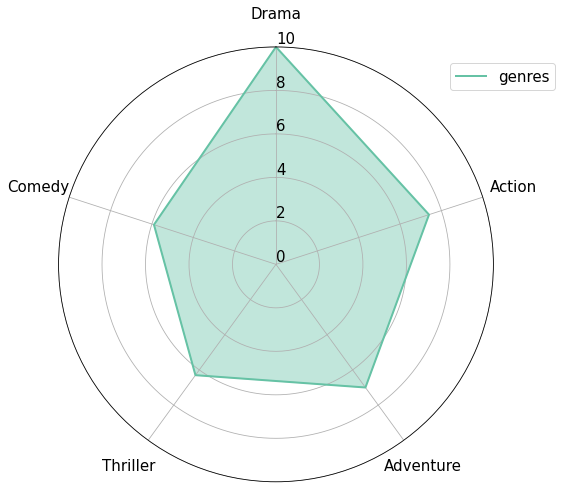

In [463]:
## 하나로 합치기
labels = df.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot(polar=True)
for i, row in df.iterrows():
    color = my_palette(i)
    data = df.iloc[i].drop('Character').tolist()
    data += data[:1]
    
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=15) ## 각도 축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=22) ## 각 축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## 반지름 축 눈금 라벨 각도 설정(degree 단위)
    plt.yticks([0,2,4,6,8,10],['0','2','4','6','8','10'], fontsize=15) ## 반지름 축 눈금 설정
    plt.ylim(0,10)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=row.Character) ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.

    # plt.title('cast preference', size=30, color='black',y=1.2, loc='center') ## 타이틀은 캐릭터 클래스로 한다.
    plt.rc('legend', fontsize=15)
    
plt.legend(loc=(0.9,0.9))
plt.savefig('./gr.png')
plt.show()

In [464]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer()
m = count_vec.fit_transform(user_keyword_df.director)
m.toarray()

array([[0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
       [3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
       [0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0],
       [0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0],
       [0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0]])

In [465]:
keyword_counts = np.sum(m.toarray(), axis=0)
keyword_counts_df = pd.DataFrame(keyword_counts)
keyword_counts_df

,0
0,3
1,5
2,3
3,5
4,5
5,3
6,3
7,5
8,3
9,3


In [466]:
keyword_index = count_vec.vocabulary_
keyword_index = dict(zip(keyword_index.values(),keyword_index.keys()))
keyword_index_df = pd.DataFrame([keyword_index])
keyword_index_df = keyword_index_df.transpose().sort_index()
keyword_index_df

,0
0,davidcarson
1,edwardzwick
2,jamescameron
3,joelschumacher
4,kevincostner
5,melgibson
6,phillipnoyce
7,quentintarantino
8,rennyharlin
9,robertzemeckis


In [467]:
keyword_info_df = pd.concat([keyword_index_df, keyword_counts_df], axis = 1)
keyword_info_df.columns = ['director', 'count']
keyword_info_df = keyword_info_df.sort_values('count', ascending = False).reset_index(drop=True)
keyword_info_df = keyword_info_df
# keyword_info_df.to_csv("genres_info.csv", mode='w', index=False)
keyword_info_df

,director,count
0,edwardzwick,5
1,joelschumacher,5
2,kevincostner,5
3,quentintarantino,5
4,davidcarson,3
5,jamescameron,3
6,melgibson,3
7,phillipnoyce,3
8,rennyharlin,3
9,robertzemeckis,3


In [468]:
df = pd.DataFrame({
'Character': ['director'],
'Edward\n Zwick': [round( keyword_info_df.loc[0, 'count'] / keyword_info_df.loc[0, 'count'] * 10, 1)],
'Joel\n Schuma\ncher': [round( keyword_info_df.loc[1, 'count'] / keyword_info_df.loc[0, 'count'] * 10, 1)],
'Kevin\n Costner': [round( keyword_info_df.loc[2, 'count'] / keyword_info_df.loc[0, 'count'] * 10, 1)],
'Quentin\n Tarantino': [round( keyword_info_df.loc[3, 'count'] / keyword_info_df.loc[0, 'count'] * 10, 1)],
'David\n Carson': [round( keyword_info_df.loc[4, 'count'] / keyword_info_df.loc[0, 'count'] * 10, 1)]
})

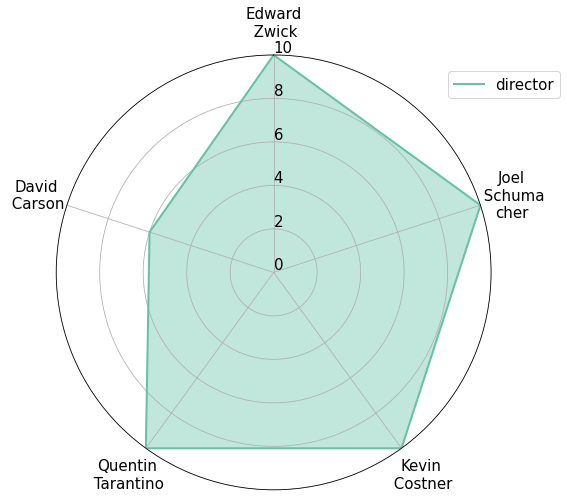

In [469]:
## 하나로 합치기
labels = df.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot(polar=True)
for i, row in df.iterrows():
    color = my_palette(i)
    data = df.iloc[i].drop('Character').tolist()
    data += data[:1]
    
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=15) ## 각도 축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=22) ## 각 축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## 반지름 축 눈금 라벨 각도 설정(degree 단위)
    plt.yticks([0,2,4,6,8,10],['0','2','4','6','8','10'], fontsize=15) ## 반지름 축 눈금 설정
    plt.ylim(0,10)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=row.Character) ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.

    # plt.title('cast preference', size=30, color='black',y=1.2, loc='center') ## 타이틀은 캐릭터 클래스로 한다.
    plt.rc('legend', fontsize=15)
    
plt.legend(loc=(0.9,0.9))
plt.savefig('./dr.png')
plt.show()

In [470]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer()
m = count_vec.fit_transform(user_keyword_df.cast)
m.toarray()

array([[0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
        0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
       [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
        3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0],
       [5, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [471]:
keyword_counts = np.sum(m.toarray(), axis=0)
keyword_counts_df = pd.DataFrame(keyword_counts)
keyword_counts_df

,0
0,5
1,3
2,5
3,3
4,5
5,3
6,3
7,3
8,5
9,3


In [472]:
keyword_index = count_vec.vocabulary_
keyword_index = dict(zip(keyword_index.values(),keyword_index.keys()))
keyword_index_df = pd.DataFrame([keyword_index])
keyword_index_df = keyword_index_df.transpose().sort_index()
keyword_index_df

,0
0,aidanquinn
1,annearcher
2,anthonyhopkins
3,arnoldschwarzenegger
4,bradpitt
5,brentspiner
6,catherinemccormack
7,garysinise
8,grahamgreene
9,harrisonford


In [473]:
keyword_info_df = pd.concat([keyword_index_df, keyword_counts_df], axis = 1)
keyword_info_df.columns = ['cast', 'count']
keyword_info_df = keyword_info_df.sort_values('count', ascending = False).reset_index(drop=True)
keyword_info_df = keyword_info_df
# keyword_info_df.to_csv("genres_info.csv", mode='w', index=False)
keyword_info_df

,cast,count
0,aidanquinn,5
1,jackson,5
2,valkilmer,5
3,umathurman,5
4,tommyleejones,5
5,samuell,5
6,marymcdonnell,5
7,johntravolta,5
8,jimcarrey,5
9,kevincostner,5


In [474]:
df = pd.DataFrame({
'Character': ['cast'],
'Anthony\n Hopkins': [round( keyword_info_df.loc[0, 'count'] / keyword_info_df.loc[0, 'count'] * 10, 1)],
'Brad\n Pitt': [round( keyword_info_df.loc[1, 'count'] / keyword_info_df.loc[0, 'count'] * 10, 1)],
'John\n Travolta' : [round( keyword_info_df.loc[2, 'count'] / keyword_info_df.loc[0, 'count'] * 10, 1)],
'Kevin\n Costner': [round( keyword_info_df.loc[3, 'count'] / keyword_info_df.loc[0, 'count'] * 10, 1)],
'Val\n Kilmer': [round( keyword_info_df.loc[4, 'count'] / keyword_info_df.loc[0, 'count'] * 10, 1)]
})

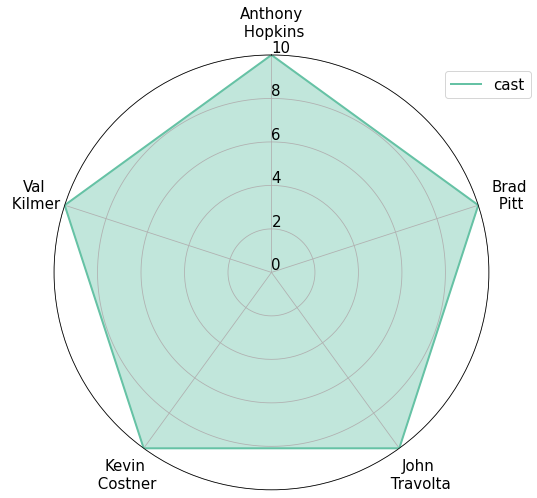

In [475]:
## 하나로 합치기
labels = df.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot(polar=True)
for i, row in df.iterrows():
    color = my_palette(i)
    data = df.iloc[i].drop('Character').tolist()
    data += data[:1]
    
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    # fontweight = 'bold'
    plt.xticks(angles[:-1], labels, fontsize=15) ## 각도 축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=22) ## 각 축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## 반지름 축 눈금 라벨 각도 설정(degree 단위)
    plt.yticks([0,2,4,6,8,10],['0','2','4','6','8','10'], fontsize=15) ## 반지름 축 눈금 설정
    plt.ylim(0,10)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=row.Character) ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.

    # plt.title('cast preference', size=30, color='black',y=1.2, loc='center') ## 타이틀은 캐릭터 클래스로 한다.
    plt.rc('legend', fontsize=15)
    
plt.legend(loc=(0.9,0.9))
plt.savefig('./cs.png')
plt.show()